# Magnetic bottle
## An interactive simulator

The magnetic bottle is a confinement machine that works based on the motion of single particles in magnetic fileds with parallel gradients.

The configuration is based on the following picture:

<img src="config.png"  style="width: 500px; float: left;" />





Taken from Freidberg, * Plasma Physics and Fusion Energy *.

Two coils with current flowing in the same direction create a magnetic field<br>
with a maximum just under each coil and a local minimum midway between.

In this device, the particle may undergo an harmonic motion due to the restoring<br> force $F_\parallel=-\mu\nabla_\parallel B$, where $\mu=\frac{mv_\perp^2}{2B}$ is an adiabatic invariant, * i.e. *, it remains constant<br> for a given particle.

***
## IMPORTANT REQUIREMENTS
Maybe you will need some python modules before running this simulation,
be sure to have pip installed before continuing:
    
    
* `brew install python3` (for Mac)

* `sudo apt-get install python3-pip` (for Debian/Ubuntu)

Start by installing scipy and matplotlib:

* `pip3 install scipy matplotlib`

Be sure to have pynbwidegts and javascript properly enabled:

* `pip3 install ipywidgets`

* `pip3 install widgetsnbextension`

* `pip3 install --upgrade widgetsnbextension`

* `pip3 install --upgrade ipywidgets`

* `jupyter nbextension enable --py --sys-prefix widgetsnbextension`
***

In [1]:
%matplotlib inline
from IPython.core.display import display, HTML 
display(HTML("<style>.container { width:60% !important; }</style>"))
import magbot
from magbot import *

### Coil System

Here you can set up the coil system as you wish:
* You can specify the $x$ position of coil 1 using `coil1_pos`
* You can define the distance between coils
* You can increase and decrease the radius of both coils
* You can set the current in both coils



In [2]:
a=coils()  

In [3]:
interact(coilinter,coil1_pos=widgets.FloatSlider(min=0,max=10.0,step=0.1,description='$x$ pos of coil 1:'),
         d=widgets.FloatSlider(min=0.1,value=5,max=10.0,step=0.1,description='coil 2 distance:')
         ,radius=widgets.FloatSlider(min=0.1,value=2.5,max=5.0,step=0.1,description='coil radius:'),fixed_scale=True,
         current=widgets.IntSlider(min=-100,value=1,max=100,step=1,description='current ($\mu$A):'),coil=fixed([a]));

### Magnetic field lines

Here You can see the magnetic filed generated by the coils.

The higher the current, the more concentrated the field lines
are ate the coils' planes.


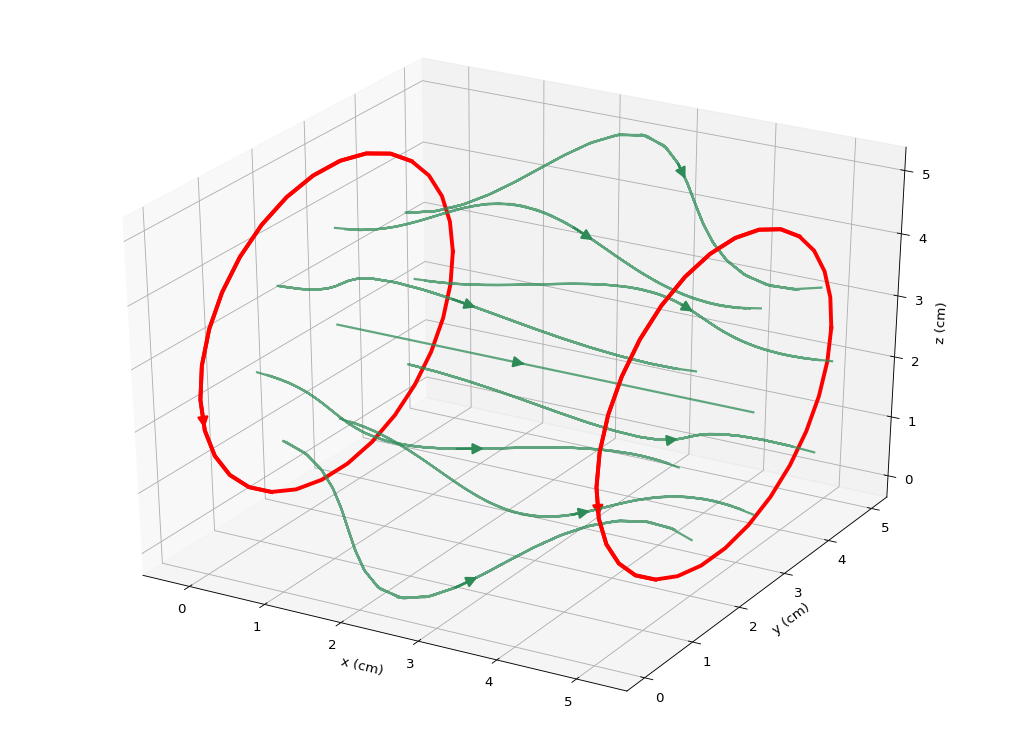

In [4]:
a.plot_flines();

Here you can check the condition that the parallel field has a maximum just under each coil and a local minimum midway between.

The relation between the Maximum and Minimum value of the magentic field: $R_m=B_{max}/B_{min}=$ 1.544 is related to the maximum allowed initial parallel velocity: <br> $$\frac{v_\parallel}{v_\perp}<\sqrt{Rm-1}=0.737$$

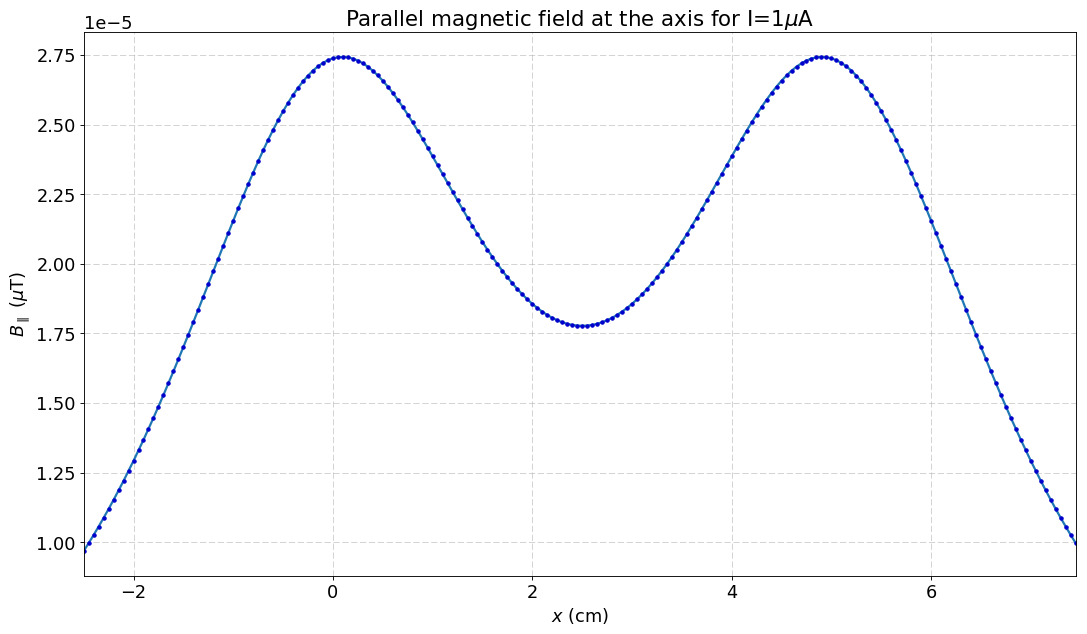

In [4]:
a.parmag();


### Particle's initial conditions

In [5]:
q=qe
m=me

For now the particle is an electron by default, but you can change its charge and mass.

You may define it's initial position and velocity (in cm and cm/s)

In [6]:
xl=a.p1+a.r/10
xh=a.p2-a.r/10
yl=a.r/10
yh=a.r*(2-1./10)
zl=a.r/10
zh=a.r*(2-1./10)
qinit=[]
interact(qiinter,x=(xl,xh),y=(yl,yh),z=(zl,zh),vx=(-1.,1.),vy=(-2.,2.),vz=(-2.,2.),fixed_scale=True,field_lines=False,coil=fixed([a]),qi=fixed(qinit));

## Simulation 
### Numpy's method

Now set the simulation time and the time step (in seconds)

In [7]:
tf=30;
dt=0.05

And run the simulation using numpy's method

In [8]:
ri=qinit[0][0:3]
vi=qinit[0][3:6]

a.lsoda_calc(ri,vi,q/m,tf,dt)

Q=a.lsodq

Q=np.transpose(Q)

r=Q[:3]
v=Q[3:6]

You may see the results by running the following two cells 
which will create an animation.

It may take some time...

In [12]:
%%capture
from animate import *
ani=anim([r],a,dt,tf)

In [10]:
from IPython.display import HTML

HTML(ani.to_html5_video())

The following cells create the animation that allows you to check whether
$\mu$ is actually an invariant in this simulation

In [11]:
%%capture 
#to hide output
animu=animmu(a,r,v,m)

In [13]:
HTML(animu.to_html5_video())

### Boris method

You may now run the simulation using the Boris pusher

In [9]:
a.boris_calc(ri,vi,q,m,tf,dt)
QB=a.borisq

QB=np.transpose(QB)

rB=QB[:3]
vB=QB[3:6]

You may see the results by running the following two cells 
which will create an animation.

It may take some time...

In [13]:
%%capture
aniB=anim([rB],a,dt,tf)

In [14]:
HTML(aniB.to_html5_video())

In [17]:
animuB.save("mag_bottlebormu.mp4",dpi=100)

The following cells create the animation that allows you to check whether
$\mu$ is actually an invariant in this simulation

In [16]:
%%capture 
#to hide output
animuB=animmu(a,rB,vB,m)

In [17]:
HTML(animuB.to_html5_video())

### Method Comparison

The rsults of both method can be seen at the same time in by running the following cells,

the blue one is the one created by using numpy's method and the orange one is the one created by

using the Boris pusher.

In [24]:
%%capture
ani2=anim([r,rB],a,dt,tf,["Python","Boris"])

In [25]:
HTML(ani2.to_html5_video())

In [17]:
ani2.save("mag_bottlecmp.mp4",dpi=100)

Here you can see the cartesian distance between both particle as time goes by

(it seems to be periodic, I will need to investigate this further)

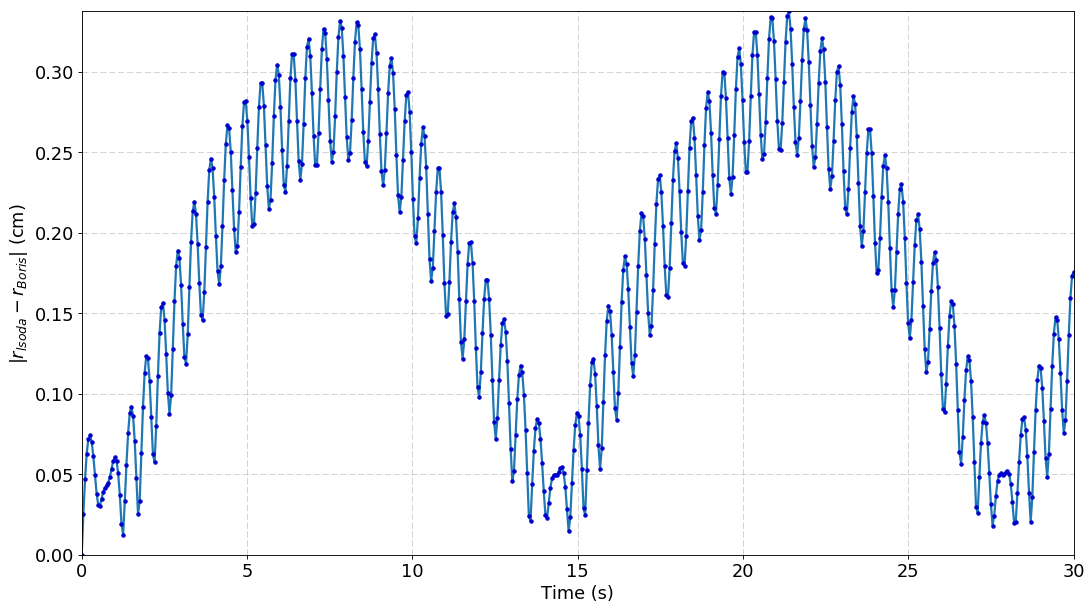

In [10]:
fig=plt.figure(figsize=(16, 9), dpi= 80, facecolor='w', edgecolor='k');
i=0
su=0
matplotlib.rcParams.update({'font.size': 16})
while i<3:
    su=su+(r[i]-rB[i,:-1])**2
    i=i+1
su=np.sqrt(su) 
axes = plt.gca()
axes.set_xlim([0,tf])
axes.set_ylim([min(su),max(su)])
plt.ylabel('$|r_{lsoda}-r_{Boris}|$ (cm)')
plt.xlabel('Time (s)')
plt.grid(alpha=0.6,linestyle='dashed')
timearr=np.linspace(0,tf,int(tf/dt))
axes.plot(timearr,su,'-',lw=2);
axes.plot(timearr,su,'.',c='mediumblue');
fig.savefig("dist.pdf")

As the two methods provide slightly different results, probably one of them is not conserving energy, let's see which:

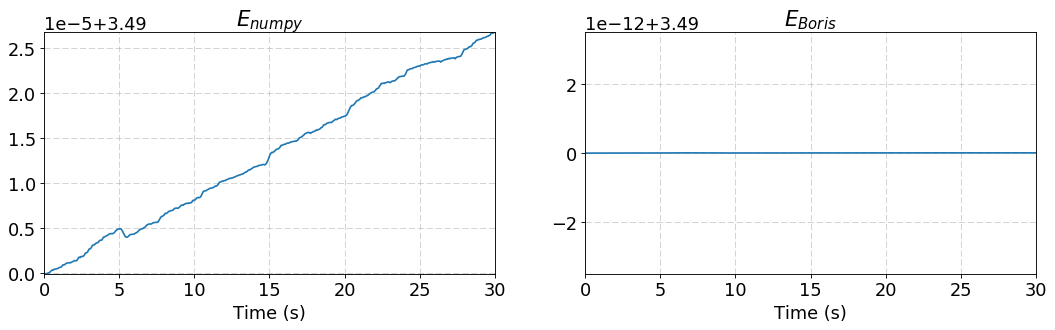

In [11]:
i=0
E1=[]
E2=[]
while i<len(rB[0])-1:
    E1.append(v[0][i]**2+v[1][i]**2+v[2][i]**2)
    E2.append(vB[0][i]**2+vB[1][i]**2+vB[2][i]**2)
    i=i+1
    
fig=plt.figure(figsize=(16, 4), dpi= 80, facecolor='w', edgecolor='k');
ax1=plt.subplot(1,2,1);
ax1.set_ylim([min(E1),max(E1)])
ax1.set_xlim([min(timearr),max(timearr)])
ax1.yaxis.get_major_formatter().set_powerlimits((0, 1))
ax1.grid(alpha=0.6,linestyle='dashed')
ax1.set_xlabel('Time (s)')
plt.plot(timearr,E1);
ax1.set_title("$E_{numpy}$");
ax2=plt.subplot(1,2,2);
#ax2.set_ylim([min(E2),max(E2)])
ax2.set_xlim([min(timearr),max(timearr)])
ax2.grid(alpha=0.6,linestyle='dashed')
ax2.set_xlabel('Time (s)')


plt.plot(timearr,E2);
ax2.set_title("$E_{Boris}$");
fig.savefig("enecomp.pdf")

Could it be that the variation of energy using numpy's method is affected by the time step?

Let's see (it may take some time)

0.02
0.002
0.0002
2e-05
2e-06


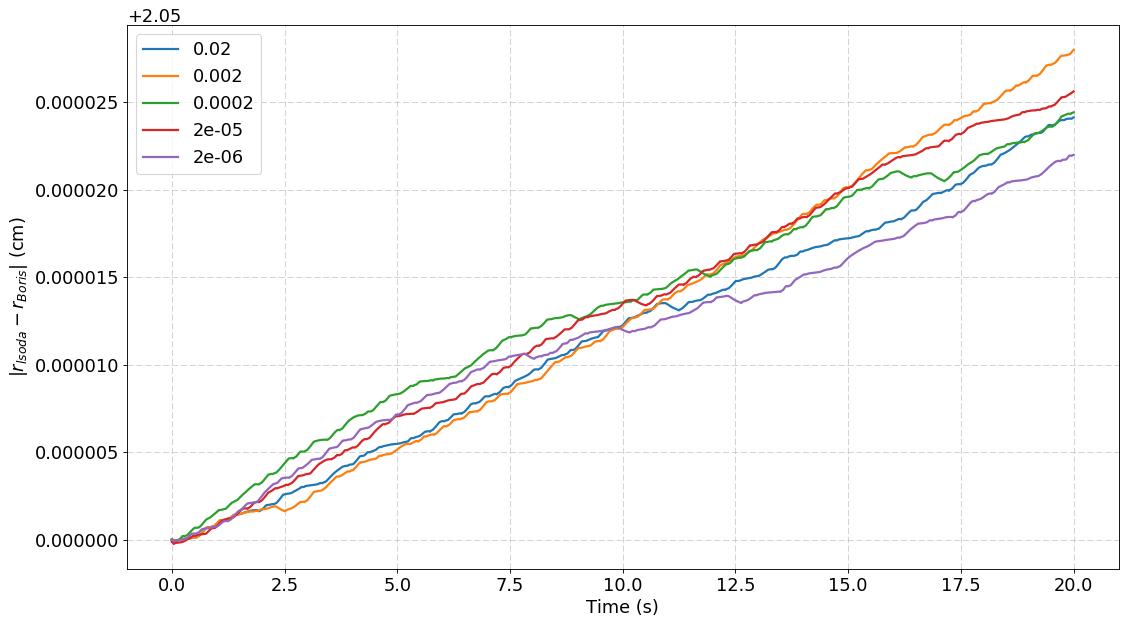

In [16]:
fig=plt.figure(figsize=(16, 9), dpi= 80, facecolor='w', edgecolor='k');

dtl=[0.02,0.002,0.0002,0.00002,2e-6]


Ek=[]
#Ek=[[np.array(timearr),E1]]
for dti in dtl:    
    a.lsoda_calc(ri,vi,-1,tf,dti)
    Q=a.lsodq
    Q=np.transpose(Q)
    rx=Q[0:3]
    vx=Q[3:6]
    Ex=[]
    i=0
    timearr=np.linspace(0,tf,int(tf/dti))
    while i<len(rx[0]):
        Ex.append(vx[0][i]**2+vx[1][i]**2+vx[2][i]**2)
        i=i+1
    print(dti)    
    Ek.append([np.array(timearr),Ex])




axes = plt.gca()
#axes.set_xlim([0,tf])
#axes.set_ylim([min(su),max(su)])
#plt.ylabel('$|r_{lsoda}-r_{Boris}|$ (cm)')
plt.xlabel('Time (s)')
plt.grid(alpha=0.6,linestyle='dashed')
timearr=np.array(np.linspace(0,tf,int(tf/dt)))
for i in range(len(Ek)):
    axes.plot(Ek[i][0],Ek[i][1],'-',lw=2,label=str(dtl[i]));
    
axes.legend()    
#axes.plot(Ek[1][0],Ek[1][1],'-',c='mediumblue');



# From here on it's just a graveyard of code, don't pay attention to it

In [ ]:
fig=plt.figure(figsize=(16, 4), dpi= 80, facecolor='w', edgecolor='k');
ax1=plt.subplot(1,3,1);
plt.plot(r[0],vp2);
ax1.set_title("$v_\perp^2$");
ax2=plt.subplot(1,3,2);
plt.plot(r[0],Barr);
ax2.set_title("$B$");
ax3=plt.subplot(1,3,3);
plt.plot(r[0],muplt);
#ax3.set_ylim([0, 0.2]);
ax3.set_title("$\mu=mv_\perp^2/2B$");

plt.show()

In [14]:
Ek[1]

[array([  0.        ,   0.02002002,   0.04004004,   0.06006006,
          0.08008008,   0.1001001 ,   0.12012012,   0.14014014,
          0.16016016,   0.18018018,   0.2002002 ,   0.22022022,
          0.24024024,   0.26026026,   0.28028028,   0.3003003 ,
          0.32032032,   0.34034034,   0.36036036,   0.38038038,
          0.4004004 ,   0.42042042,   0.44044044,   0.46046046,
          0.48048048,   0.5005005 ,   0.52052052,   0.54054054,
          0.56056056,   0.58058058,   0.6006006 ,   0.62062062,
          0.64064064,   0.66066066,   0.68068068,   0.7007007 ,
          0.72072072,   0.74074074,   0.76076076,   0.78078078,
          0.8008008 ,   0.82082082,   0.84084084,   0.86086086,
          0.88088088,   0.9009009 ,   0.92092092,   0.94094094,
          0.96096096,   0.98098098,   1.001001  ,   1.02102102,
          1.04104104,   1.06106106,   1.08108108,   1.1011011 ,
          1.12112112,   1.14114114,   1.16116116,   1.18118118,
          1.2012012 ,   1.22122122,   1.

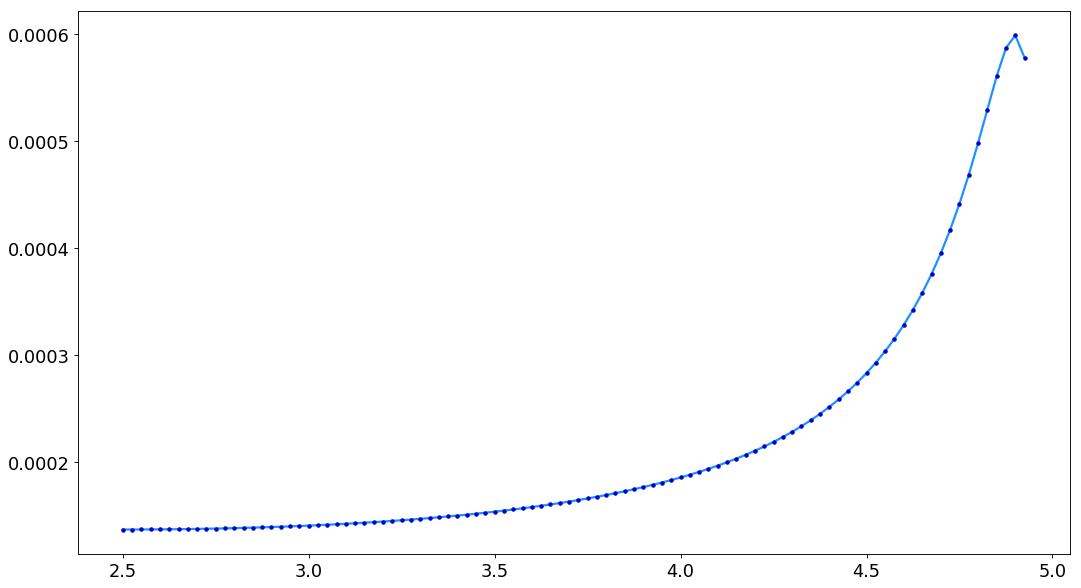

In [ ]:
import matplotlib

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure()
ax=fig.gca(projection='3d')
    #ax = fig.add_subplot(111)
    #fig.subplots_adjust(top=0.85)
    #ax.set_title('Some drift')

ax.set_xlabel('x ($\omega_c/v_d$)')
ax.set_ylabel('y ($\omega_c/v_d$)')
ax.set_zlabel('z ($\omega_c/v_d$)')

#print(r)


ax.plot(r[0],r[1],r[2],lw=0.5,label="Particle trajctory")
ax.scatter(r[0,0],r[1,0],r[2,0],c='red')
ax.legend()
    #print(r)
    #plt.save('drft.pdf')
plt.show()


In [15]:
x

array([ 2.5])

In [ ]:



import matplotlib

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure()
ax=fig.gca(projection='3d')
    #ax = fig.add_subplot(111)
    #fig.subplots_adjust(top=0.85)
    #ax.set_title('Some drift')

ax.set_xlabel('x ($\omega_c/v_d$)')
ax.set_ylabel('y ($\omega_c/v_d$)')
ax.set_zlabel('z ($\omega_c/v_d$)')





    #print(r)


ax.plot(rB[0],rB[1],rB[2],lw=0.5)
ax.scatter(rB[0,0],rB[1,0],rB[2,0],c='red')

    #print(r)
    #plt.save('drft.pdf')
plt.show()



In [ ]:
i=0
vp2B=[]
BarrB=[]
mupltB=[]
vB=np.transpose(traj.getv())
while i<len(rB[0]):
    vp2B.append(vB[1][i]**2+vB[2][i]**2)
    BarrB.append(np.linalg.norm(a.get_Bf([rB[0][i],rB[1][i],rB[2][i]])))
    mupltB.append(vp2B[i]/(2*BarrB[i]))
    i=i+1

In [ ]:
fig=plt.figure(figsize=(16, 4), dpi= 80, facecolor='w', edgecolor='k');
ax1=plt.subplot(1,3,1);
plt.plot(rB[0],vp2B);
ax1.set_title("$v_\perp^2$");
ax2=plt.subplot(1,3,2);
plt.plot(rB[0],BarrB);
ax2.set_title("$B$");
ax3=plt.subplot(1,3,3);
plt.plot(rB[0],mupltB);
#ax3.set_ylim([0, 0.2]);
ax3.set_title("$\mu=mv_\perp^2/2B$");



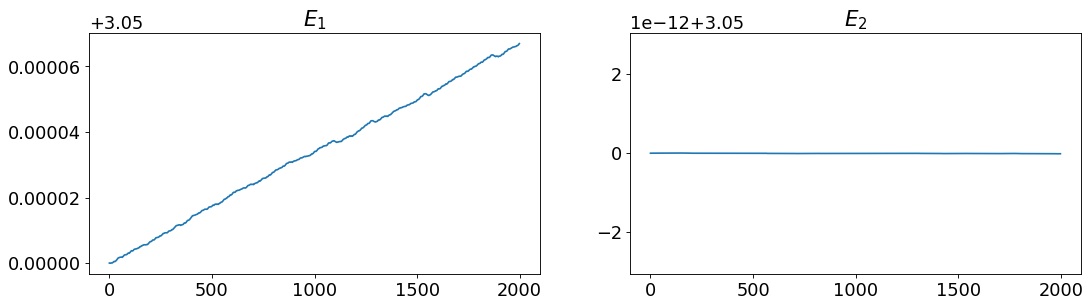

In [18]:
i=0
E1=[]
E2=[]
while i<len(r[0])-1:
    E1.append(v[0][i]**2+v[1][i]**2+v[2][i]**2)
    E2.append(vB[0][i]**2+vB[1][i]**2+vB[2][i]**2)
    i=i+1
    
fig=plt.figure(figsize=(16, 4), dpi= 80, facecolor='w', edgecolor='k');
ax1=plt.subplot(1,2,1);
plt.plot(E1);
ax1.set_title("$E_1$");
ax2=plt.subplot(1,2,2);
plt.plot(E2);
ax2.set_title("$E_2$");

In [ ]:
E2

In [ ]:
len(r[0])

In [ ]:
r[0]

In [ ]:
rB[0]

In [ ]:
def animclose(data, coil):
    a=coil
    ### ANIMATION SET UP
    def update_lines(num, dataLines, lines) :
        #for line, data in zip(lines, dataLines) :
        # NOTE: there is no .set_data() for 3 dim data...
        xd=0
        if num>55:
            xd=num-55
        
        
        for ilin in range(int(len(lines)/2)):
            dat1=data[ilin]
            lines[2*ilin].set_data(dat1[0:2, xd:num])
            lines[2*ilin].set_3d_properties(dat1[2,xd:num])
            lines[2*ilin+1].set_data(dat1[0:2, num-1:num])
            lines[2*ilin+1].set_3d_properties(dat1[2,num-1:num])
        
        
        
        """if a.curr>0:
            ax.plot(cir[0][4:21],cir[1][4:21],cir[2][4:21],lw=1.5,c='red')
            ax.plot(cir2[0][4:21],cir2[1][4:21],cir2[2][4:21],lw=1.5,c='red')
        else:
            ax.plot(cir[0][11:26],cir[1][11:26],cir[2][11:26],lw=1.5,c='red')
            ax.plot(cir2[0][11:26],cir2[1][11:26],cir2[2][11:26],lw=1.5,c='red')"""
        return lines
    
    if len(data)<=4:
        plt.rc('axes',prop_cycle=(cycler('color', ['dodgerblue', 'b', 'darkorange', 'orangered','limegreen','forestgreen','mediumorchid','blueviolet'])))
    else:
        plt.rc('axes',prop_cycle=(cycler('color', ['dodgerblue', 'b'])))

    fig = plt.figure(figsize=(12, 6.75), dpi=80)
    ax = p3.Axes3D(fig)

    cir,cir2=a.calc_circ()
    
    """ax.plot(cir[0],cir[1],cir[2],lw=1.5,c='red')
    ax.plot(cir2[0],cir2[1],cir2[2],lw=1.5,c='red')"""
    lines=[]
    for dat in data:
        lines.append(ax.plot(dat[0, 0:1], dat[1, 0:1], dat[2, 0:1])[0])
        lines.append(ax.plot(dat[0, 0:1], dat[1, 0:1], dat[2, 0:1],'o-')[0])
    
    
    if a.curr != 0 and False:
        cir=np.transpose(cir)
        cir2=np.transpose(cir2)
        ra=cir[int(len(cir)/2)]
        rb=cir[int(len(cir)/2)+1]
        ar = Arrow3D([ra[0],rb[0]],[ra[1],rb[1]],[ra[2],rb[2]], mutation_scale=10,lw=1, arrowstyle="-|>", color="red")
        ax.add_artist(ar)
        ra=cir2[int(len(cir2)/2)]
        rb=cir2[int(len(cir2)/2)+1]
        br = Arrow3D([ra[0],rb[0]],[ra[1],rb[1]],[ra[2],rb[2]], mutation_scale=10,lw=1, arrowstyle="-|>", color="red")
        ax.add_artist(br)

        # Setting the axes properties
        #ax.set_xlim3d([-0.2, 2.2])
        #ax.set_xlabel('X')

        #ax.set_ylim3d([2, 4])
        #ax.set_ylabel('Y')

        #ax.set_zlim3d([2, 4])
        #ax.set_zlabel('Z')

        #ax.set_title('3D Test')


    # Creating the Animation object
    line_ani = animation.FuncAnimation(fig, update_lines,500, fargs=(data, lines),
                                   interval=50, blit=False)
    
    return line_ani



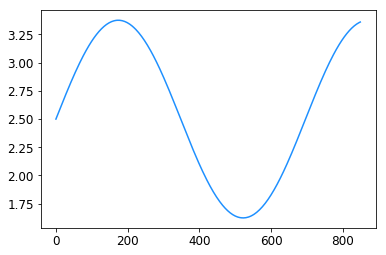

In [11]:
plt.plot(r[0])